# Build a simple trading strategy 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Manipulate the stock data and add two columns - MA10 and MA50

In [18]:
stock = pd.read_csv('../data/stocks/GOOG.csv', index_col="date")
stock['MA10'] = stock['close'].rolling(10).mean()
stock['MA50'] = stock['close'].rolling(50).mean()
stock = stock.dropna()
stock.head()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,MA10,MA50
date,,,,,,,,,,
2014-06-06,558.06,558.06,548.9300,556.33,556.33,1732000,0.0,1.0,555.406,539.6980
2014-06-09,557.15,562.90,556.0400,562.12,562.12,1463500,0.0,1.0,556.348,539.7712
2014-06-10,560.51,563.60,557.9000,560.55,560.55,1348000,0.0,1.0,555.808,539.7824
2014-06-11,558.00,559.88,555.0201,558.84,558.84,1097100,0.0,1.0,555.524,539.8198
2014-06-12,557.30,557.99,548.4600,551.35,551.35,1454500,0.0,1.0,554.651,539.5036


### 2. Add "Shares" column to make decisions base on the strategy 

In [19]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

stock['shares'] = [1 if stock.loc[ei, 'MA10']>stock.loc[ei, 'MA50'] else 0 for ei in stock.index]

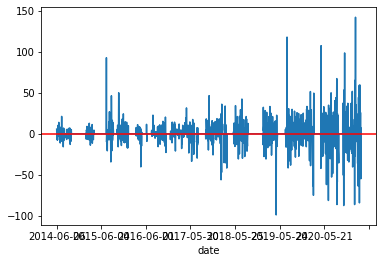

In [20]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

stock['close1'] = stock['close'].shift(-1)
stock['profit'] = [stock.loc[ei, 'close1'] - stock.loc[ei, 'close'] if stock.loc[ei, 'shares']==1 else 0 for ei in stock.index]
stock['profit'].plot()
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [21]:
#Use .cumsum() to calculate the accumulated wealth over the period

stock['wealth'] = stock['profit'].cumsum()
stock.tail()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,MA10,MA50,shares,close1,profit,wealth
date,,,,,,,,,,,,,,
2021-03-15,2062.30,2067.06,2043.51,2066.49,2066.49,1298325,0.0,1.0,2063.526,1962.5344,1,2092.52,26.03,1189.17
2021-03-16,2078.99,2123.56,2070.00,2092.52,2092.52,1491564,0.0,1.0,2065.194,1969.3472,1,2091.08,-1.44,1187.73
2021-03-17,2076.03,2109.78,2054.00,2091.08,2091.08,1299016,0.0,1.0,2071.631,1976.6040,1,2036.22,-54.86,1132.87
2021-03-18,2061.00,2075.50,2033.55,2036.22,2036.22,1362430,0.0,1.0,2070.344,1982.5100,1,2043.20,6.98,1139.85
2021-03-19,2042.05,2053.10,2017.68,2043.20,2043.20,2314893,0.0,1.0,2063.810,1988.6682,1,NaN,NaN,NaN


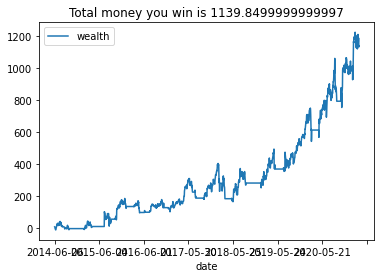

In [22]:
# plot the wealth to show the growth of profit over the period

stock['wealth'].plot()
plt.title('Total money you win is {}'.format(stock.loc[stock.index[-2], 'wealth']))
plt.legend()